<center><h1><font color="blue">Prevendo Vendas de Jogos na América do Norte</font></h1></center>

<p>Um levantanmento dos jogos mais vendidos nos últimos tempos foi realizado pelo Cientista de Dados <abbr title="um usuário do Kaggle">Gregory Smith</abbr> e disponibilizado no website mais famoso de datasets públicos: <b>Kaggle</b>.</p>

<p>Você foi contratado por uma empresa norte-americana com o intuito de analisar o dataset e construir um modelo de Machine Learning capaz de prever o lucro de um novo jogo no continente.</p>

<p>O dataset está disponibilizado em: <a href="https://www.kaggle.com/gregorut/videogamesales" target="_blank">https://www.kaggle.com/gregorut/videogamesales</a> em formato excell.</p>

<h2><font color="red">Importações</font></h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv

<h2><font color="red">0) Carregamento dos Dados</font></h2>

Primeiramente, vamos checar os dados presentes no dataset e realizar a exclusão das variáveis que não serão úteis na análise.<br>

<u>Dicionário de Variáveis:</u>
<ul>
    <li>`Rank:` posição do jogo no ranking</li>
    <li>`Name:` nome do jogo</li>
    <li>`Platform:` plataforma onde o jogo é rodado</li>
    <li>`Year:` ano de estréia do jogo</li>
    <li>`Genre:` gênero do jogo</li>
    <li>`Publisher:` empresa criadora do jogo</li>
    <li>`NA_Sales:` vendas na américa do Norte (em milhões)</li>
    <li>`EU_Sales:` vendas na Europa (em milhões)</li>
    <li>`´JP_Sales:` vendas no Japão (em milhões)</li>
    <li>`Other_Sales:` vendas em outros locais do planeta (em mihões)</li>
    <li>`Global_Sales: vendas no mundo`</li>
</ul>

<hr>

Para começar, vamos realizar o carregamento dos dados salvos no arquivo <em>vgsales.csv</em> e exibir o cinco primeiros registros dele.

In [2]:
vendas_jogos = pd.read_csv("vgsales.csv", index_col='Rank')
vendas_jogos.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<h2><font color="red">1) Limpeza dos Dados</font></h2>

Como vamos analisar o lucro na América do Norte, vamos descartar <em>JP_Sales, EU_Sales, Other_Sales e Global_Sales</em> e considerar apenas as vendas do <em>NA_Sales</em>. Também, o nome do jogo e a posição dele no rank serão irrelevantes, pois nosso foco não será analisar os jogos que estão em rankings altos ou baixos.

Com a limpeza das variáveis, teremos: <br>

<u>Dicionário de Variáveis:</u>
<ul>
    <li>`Platform:` plataforma onde o jogo é rodado</li>
    <li>`Year:` ano de estréia do jogo</li>
    <li>`Genre:` gênero do jogo</li>
    <li>`Publisher:` empresa criadora do jogo</li>
    <li>`NA_Sales:` vendas na América do Norte (em milhões)</li>
</ul>

<hr>

Agora, extraímos as variáveis necessárias para a modelagem e salvar os dados no arquivo <em>vgsales_limpo.csv</em>.

In [3]:
vendas_jogos_colunas = ['Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales']
vendas_jogos_lista = vendas_jogos[vendas_jogos_colunas].values.tolist()

In [4]:
# Escrevendo no Arquivo Excell
with open('vgsales_limpo.csv', 'w', newline='') as vendas_jogos_limpo:
    escrita = csv.writer(vendas_jogos_limpo)
    escrita.writerow(vendas_jogos_colunas)
    for linha in vendas_jogos_lista: escrita.writerow(linha)

In [5]:
# Buffer
del vendas_jogos, vendas_jogos_colunas, vendas_jogos_lista, vendas_jogos_limpo

<h2><font color="red">2) Análise Exploratória</font></h2>

Com as variáveis que precisaremos para a modelagem já extraídas, nosso arquivo de foco será o <em>vgsales_limpo.csv</em> agora. Nosso próximo passo será verificar se há dados corrompidos (os denominados 'ruídos') dentro de nosso dataset limpo.

In [6]:
# Carregando o novo arquivo e exibindo os sete primeiros registros
vendas_jogos = pd.read_csv('vgsales_limpo.csv')
vendas_jogos.head()

,Platform,Year,Genre,Publisher,NA_Sales
0,Wii,2006.0,Sports,Nintendo,41.49
1,NES,1985.0,Platform,Nintendo,29.08
2,Wii,2008.0,Racing,Nintendo,15.85
3,Wii,2009.0,Sports,Nintendo,15.75
4,GB,1996.0,Role-Playing,Nintendo,11.27


In [7]:
# Verificando tamanho do dataset
print('Linhas: %i' % (vendas_jogos.shape[0]))
print('Colunas: %i' % (vendas_jogos.shape[1]))

Linhas: 16598
Colunas: 5


In [8]:
# Verificando Presença de Dados Nulos\Corrompidos
vendas_jogos.isnull().sum()

Platform       0
Year         271
Genre          0
Publisher     58
NA_Sales       0
dtype: int64

In [9]:
# Encontramos mais ou menos 329 linhas com dados nulos (271 linhas na coluna Year e 58 linhas na coluna Publisher)
# Uma forma de corrigir isto é preenchendo estes campos com a média da coluna deles
vendas_jogos = vendas_jogos.fillna(vendas_jogos.mean())

# Agora checamos se está tudo ok
vendas_jogos.isnull().sum()

Platform      0
Year          0
Genre         0
Publisher    58
NA_Sales      0
dtype: int64

In [10]:
# Ainda restam 58 linhas nulas para a coluna Publisher e, como ela trata-se de uma string, iremos manipulá-la mais tarde
# Agora, vamos nos verificar se há valores zerados no dataset
(vendas_jogos == 0).sum()

Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales     4499
dtype: int64

In [11]:
# Vamos preencher os tais dados zerados com a média da coluna a qual pertencem
vendas_jogos['NA_Sales'] = np.where(vendas_jogos['NA_Sales'] == 0, vendas_jogos['NA_Sales'].mean(), vendas_jogos['NA_Sales'])
(vendas_jogos == 0).sum()

Platform     0
Year         0
Genre        0
Publisher    0
NA_Sales     0
dtype: int64

<hr>
Com as colunas corrigidas (com exceção da de Publisher. Fique com isso em mente, pois já já vamos corrigi-la), podemos estar levantando dados estatísticos em nosso dataset.
Vamos começar verificando o tipo de dados de cada coluna e o resumo estatístico delas.

In [12]:
# Tipos de dados
#vendas_jogos.info() # realiza o mesmo processo, mas trazendo resultados mais detalhados
vendas_jogos.dtypes

Platform      object
Year         float64
Genre         object
Publisher     object
NA_Sales     float64
dtype: object

In [13]:
# Resumo Estatístico - Dados inteiros e floats

# count >> quantidade
# mean >> média
# std >> desvio padrão
# 50% >> mediana

vendas_jogos.describe(include=['integer', 'float'])

,Year,NA_Sales
count,16598.000000,16598.000000
mean,2006.406443,0.336407
std,5.781197,0.801770
min,1980.000000,0.010000
25%,2003.000000,0.090000
50%,2007.000000,0.264667
75%,2010.000000,0.264667
max,2020.000000,41.490000


In [14]:
# Resumo Estatístico - Strings

# count >> quantidade
# unique >> dados únicos
# top >> moda
# freq >> frequência da moda

vendas_jogos.describe(include=['object'])

,Platform,Genre,Publisher
count,16598,16598,16540
unique,31,12,578
top,DS,Action,Electronic Arts
freq,2163,3316,1351


<hr>

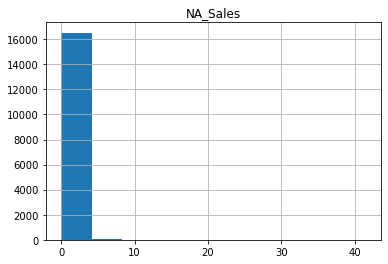

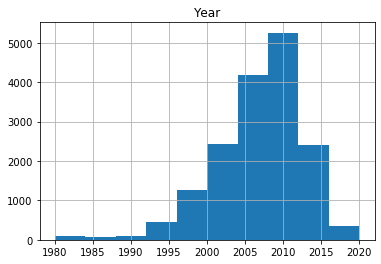

In [15]:
# Histogramas
vendas_jogos.hist('NA_Sales'); vendas_jogos.hist('Year');

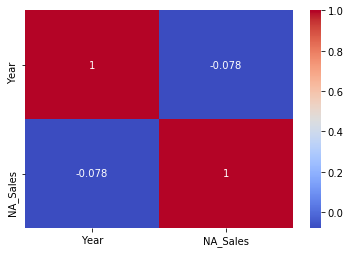

In [16]:
# Heat Map
sns.heatmap(vendas_jogos.corr(), annot=True, cmap='coolwarm');

<h2><font color="red">3) Preparação da Modelagem</font></h2>

Após verificar os dados estatísticos, já temos uma boa noção de como as variáveis estão relacionadas entre si e estamos quase prontos para modelar o algoritmo de Machine Learning. Antes, precisaremos traçar o comparativo <em>year-na_sales</em> para melhor visualizar a relação entre elas. Depois, iremos formalizar os dados Strings em inteiros para terem influência no algoritmo.

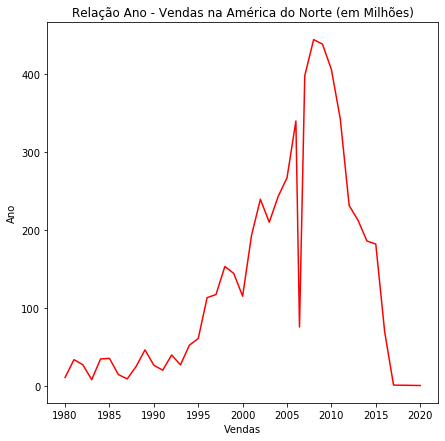

In [17]:
# Eixos 
eixo_x = vendas_jogos.sort_values(by=['Year'])
eixo_x = eixo_x[['Year', 'NA_Sales']].groupby(['Year']).sum().values.tolist()

eixo_y = vendas_jogos.sort_values(by=['Year'])
eixo_y = eixo_y['Year'].unique().tolist()

# Gráfico de Linhas
plt.figure(figsize=(7,7))

plt.title('Relação Ano - Vendas na América do Norte (em Milhões)')
plt.xlabel('Vendas')
plt.ylabel('Ano')

plt.plot(eixo_y, eixo_x, color='red')

plt.show()

In [18]:
# Buffer
del eixo_x, eixo_y

Beleza, analisando o gráfico, precebemos de que a relação entre vendas e o ano de estréia dos jogos não se dá de maneira Linear, mas sim, de uma forma <em>Logística</em>. Grave bem este nome: <b>Logística</b>!. Ele será útil mais tarde.
<br><br>
Nosso próximo passo será tratar todas as variáveis Strings como inteiros, ou seja, iremos utilizar os índices para transformar as Strings. Para ficar mais fácil a compreensão, considere a lista $frutas = ['maçã', 'pera', 'uva']$, o par (index, valor) dá-se da seguinte maneira:
<br>

<ul>
        <li>(0, 'maçã')</li>
        <li>(1, 'pera')</li>
        <li>(2, 'uva')</li>
</ul>
<br>

Logo, a lista ficará como $lista = [0, 1, 2]$. É justamente isto que vamos fazer agora e, claro, iremos corrigir os dados nulos da variável <em>Publisher</em>, provavelmente você não gravou na cabeça como eu havia pedido e esqueceram dela...

In [19]:
# Extraindo possíveis valores dos atributos strings
plataformas = vendas_jogos['Platform'].unique().tolist()
generos = vendas_jogos['Genre'].unique().tolist()
publicadores = vendas_jogos['Publisher'].unique().tolist()

print('Plataformas: %s\n' % (plataformas))
print('Gêneros: %s\n' % (generos))
print('Publicadores: %s' % (publicadores))

Plataformas: ['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA', '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC', 'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']

Gêneros: ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc', 'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy']

Publicadores: ['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive', 'Sony Computer Entertainment', 'Activision', 'Ubisoft', 'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft', 'Atari', '505 Games', 'Capcom', 'GT Interactive', 'Konami Digital Entertainment', 'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts', 'Virgin Interactive', 'Warner Bros. Interactive Entertainment', 'Universal Interactive', 'Eidos Interactive', 'RedOctane', 'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games', 'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive', 'Acclaim Entertainment', 'MTV Games', 

In [20]:
# Realizando Varredura das colunas em String
# e transformando os valores em inteiros
def Varredura(dataframe, coluna, lista):
    for dado in lista: dataframe[coluna][dataframe[coluna] == dado] = lista.index(dado)
    dataframe[coluna] = pd.to_numeric(dataframe[coluna])

def Transformar(dataframe, coluna): dataframe[coluna] = dataframe[coluna].astype(int)

In [21]:
# Transformando Strings em Inteiros
Varredura(vendas_jogos, 'Platform', plataformas)
Varredura(vendas_jogos, 'Genre', generos)
Varredura(vendas_jogos, 'Publisher', publicadores)

C:\Users\gabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [22]:
# Transformando Floats em Inteiros
vendas_jogos['NA_Sales'] = vendas_jogos['NA_Sales'] * 100 # passando os valores para centenas
Transformar(vendas_jogos, 'Year')
Transformar(vendas_jogos, 'NA_Sales')

In [23]:
vendas_jogos.head()

,Platform,Year,Genre,Publisher,NA_Sales
0,0,2006,0,0.0,4149
1,1,1985,1,0.0,2908
2,0,2008,2,0.0,1585
3,0,2009,0,0.0,1575
4,2,1996,3,0.0,1127


In [24]:
vendas_jogos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 5 columns):
Platform     16598 non-null int64
Year         16598 non-null int32
Genre        16598 non-null int64
Publisher    16540 non-null float64
NA_Sales     16598 non-null int32
dtypes: float64(1), int32(2), int64(2)
memory usage: 518.8 KB


<hr>
Finalmente chegamos! Vamos corrigir as colunas nulas de Publisher. Como transformamos ela em numérica, os campos em branco transformaram-se em nulos.

In [25]:
vendas_jogos.isnull().sum()

Platform      0
Year          0
Genre         0
Publisher    58
NA_Sales      0
dtype: int64

In [26]:
vendas_jogos = vendas_jogos.fillna(vendas_jogos.mean())
vendas_jogos.isnull().sum()

Platform     0
Year         0
Genre        0
Publisher    0
NA_Sales     0
dtype: int64

In [27]:
# quando substituímos os camos nulos pela média, a coluna de Publisher acaba voltando a ser float
# logo, precisamos transformá-la em inteiro novamente
Transformar(vendas_jogos, 'Publisher')
vendas_jogos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 5 columns):
Platform     16598 non-null int64
Year         16598 non-null int32
Genre        16598 non-null int64
Publisher    16598 non-null int32
NA_Sales     16598 non-null int32
dtypes: int32(3), int64(2)
memory usage: 453.9 KB


<hr>

Agora vamos partir à escolha do modelo de Machine Learning tomando o mapa do scikit-learn como base. 

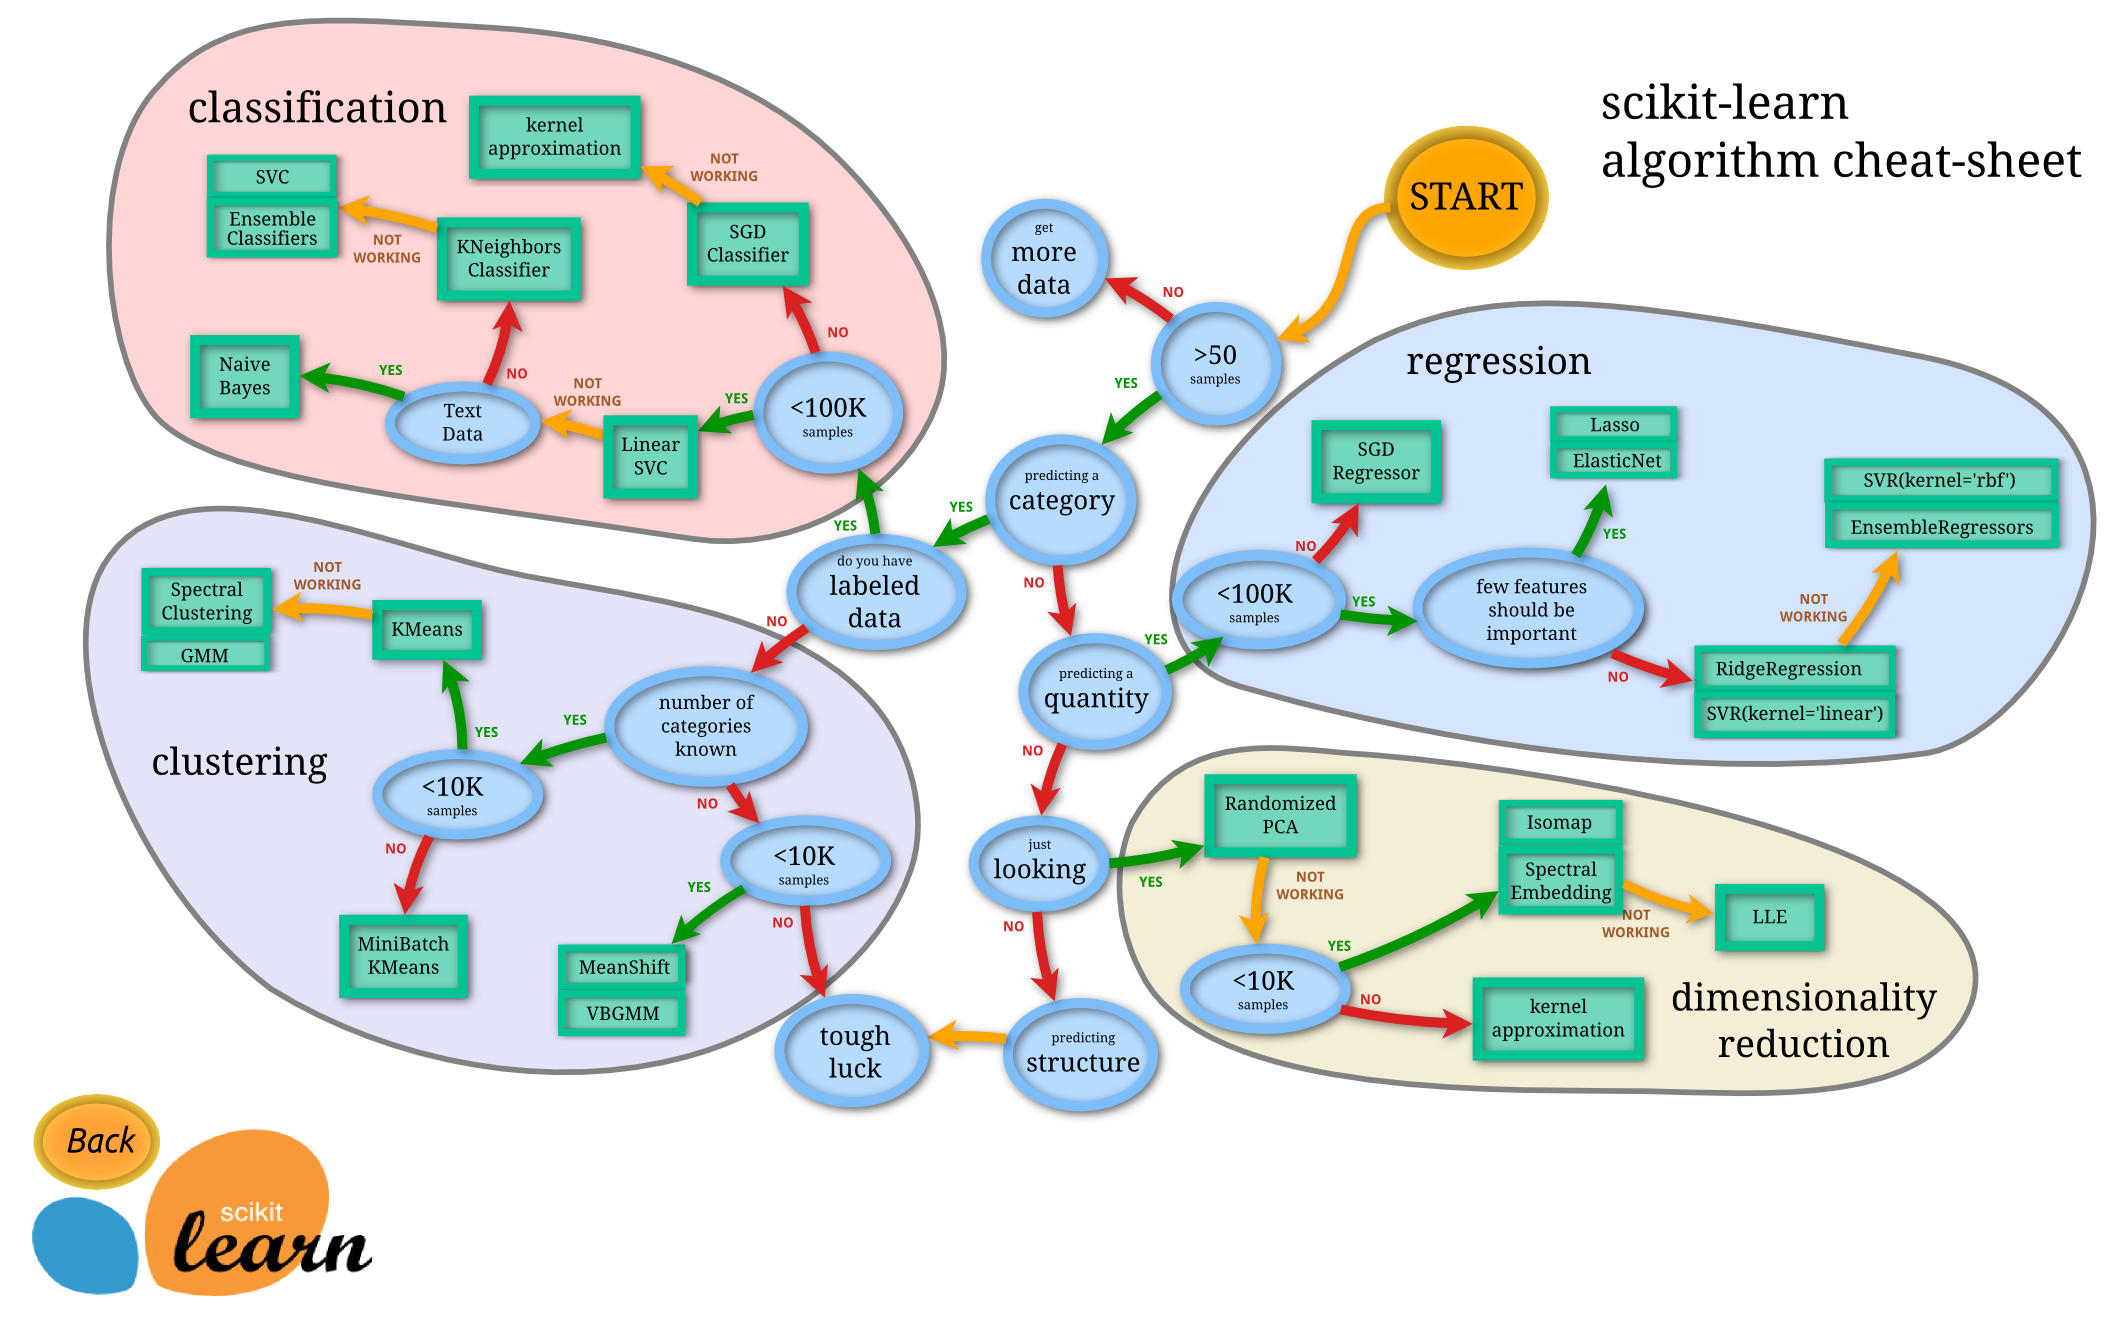

In [28]:
from IPython.display import Image
Image('ml_map.png')

Começando no ponto <em>Start</em> indagamos:

<u>Temos mais de 50.000 amostras? >> Não, temos 16.000, mas vamos continuar no percurso</u><br>
<u>Iremos prever uma categoria? >> Não, iremos prever as vendas dos games</u><br>
<u>Iremos prever quantidade? >> Sim, os valores de vendas dos games na América do Norte</u><br>

<b>Entramos na <em>Regressão</em></b>

<u>Temos menos de 100.000 amostras? >> Sim, temos 16.000</u><br>
<u>Poucos atributos são importantes? >> Sim, apenas o ano, plataforma, criadora do game, ano de estréia e vendas no Continente Americano</u>

<b>Entramos em <em>Lasso\ElasticNet</em>, mas vamos trabalhar com três métodos para comparação mais simplificados deste algoritmo: <em>Regressão Linear</em>, <em>Regressão Logística</em>, <em>Regressão Elastic</em> e <em>Regressão SGD</em></b>

<hr>
Os algoritmos de Regressão trabalham somente com números, logo, foi justamente por isto que convertemos todos os dados de Strings para inteiros, obtendo uma lista dos valores possíveis dos atributos, transformando-os numa lista e substituindo-os por seus respectivos índices no dataset.

<hr>
Para não perder o costume, vamos traçar mais uma análise relacional entre as variáveis. Como todos os dados são do tipo inteiro, as análises contará com mais gráficos e relações.

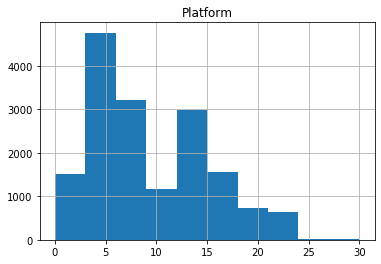

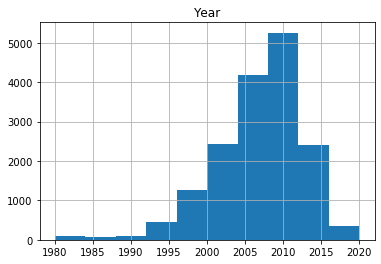

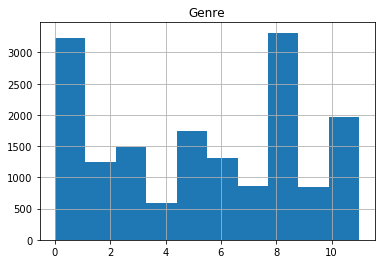

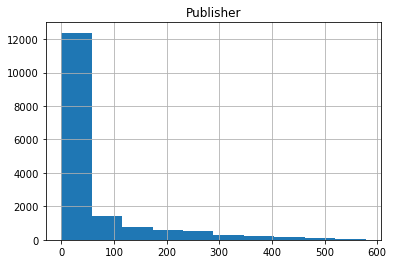

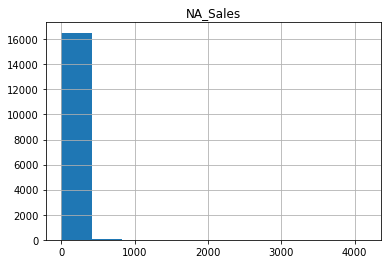

In [29]:
# Histogramas
vendas_jogos.hist('Platform'); vendas_jogos.hist('Year'); 
vendas_jogos.hist('Genre'); vendas_jogos.hist('Publisher'); 
vendas_jogos.hist('NA_Sales');

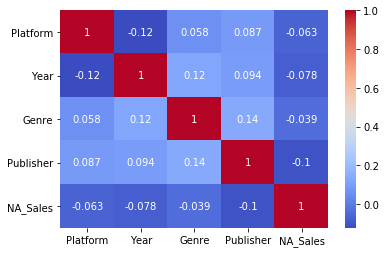

In [30]:
# Heat map
sns.heatmap(vendas_jogos.corr(), annot=True, cmap='coolwarm');

A fim de salvar o que já fizemos até agora, vamos salvar nosso dataset modelado no arquivo <em>vgsales_final.csv</em>

In [31]:
vendas_jogos_colunas = ['Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales']
vendas_jogos_lista = vendas_jogos[vendas_jogos_colunas].values.tolist()

In [32]:
# Escrevendo no Arquivo Excell
with open('vgsales_final.csv', 'w', newline='') as vendas_jogos_final:
    escrita = csv.writer(vendas_jogos_final)
    escrita.writerow(vendas_jogos_colunas)
    for linha in vendas_jogos_lista: escrita.writerow(linha)

<hr>

In [33]:
# Buffer
del vendas_jogos, vendas_jogos_colunas, vendas_jogos_lista

<hr>

<h2><font color="red">4) Modelagem</font></h2>

Come On! Vamos modelar nosso Modelo Preditivo utilizando os algoritmos de Machie Learning disponibilizados pela biblioteca <em>ScikitLearn</em>.

In [34]:
# Separador dos dados de treino e de teste
from sklearn.model_selection import train_test_split

# Escalonador das variáveis
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, Normalizer

# Algoritmos para Modelagem
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn import linear_model # outros algoritmos de regressão linear
from sklearn.linear_model import LassoCV

In [35]:
# Importando arquivo final
vendas_jogos_final = pd.read_csv('vgsales_final.csv')

In [36]:
# Instanciando o modelo
regressao_linear = LinearRegression()
regressao_logistica = LogisticRegression(random_state=1000)
regressao_elastica = ElasticNet(random_state=0)
regressao_sgd = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
regressao_lasso = linear_model.Lasso(alpha=0.3)
regressao_lasso_cv = LassoCV()

# Separando Dados - 70% treino, 30% teste
x_treino, x_teste, y_treino, y_teste = train_test_split(vendas_jogos_final[['Platform', 'Year', 'Genre', 'Publisher']], 
                                                        vendas_jogos_final.NA_Sales, 
                                                        test_size = 0.20, 
                                                        random_state = 42)

<hr>
<div style="border-radius: 5px; background-color: #f0db92; box-shadow: 5px 5px 10px black;"><p style="text-indent: 50px">Uma nota rápida: vamos considerar apenas duas variáveis de nosso dataset (as demais terão a mesma lógica...). Considere o Ano de Estréia e os Publicadores dos games. Concorda de que os valores do Ano serão entre a margem de 1980-2020 enquanto que os publicadores pegaram os índices de 0-200? Então, percebemos de que há uma grande diferença de escala entre eles.</p>
       <br><br> 
       <p style="text-indent: 50px">Isso pode acabar sendo prejudicial ao modelo de Machine Learning, resultando no efeito <em>overfitting</em>, quando nosso modelo aprende mais do que devia. Um exemplo disto seria considerar o ano de lançamento do game algo muito importante e depsrezar a publicadora, achando de que ela não vai influenciar em nada.</p>
       <br><br> 
       <p style="text-indent: 50px">Para evitar este problema, vamos utilizar algoritmos de reorganizar a escala dos dados, como o <em>MinMaxScaler</em>.</p>
</div>

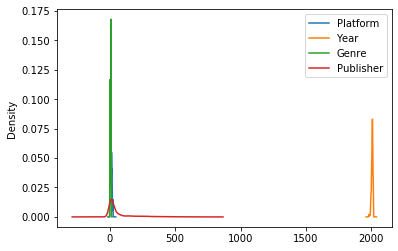

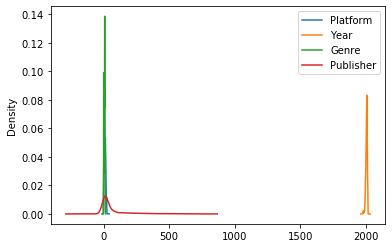

In [37]:
x_treino.plot.kde();
x_teste.plot.kde();

In [38]:
# Normalizer #
escalonador = Normalizer()
x_treino = escalonador.fit_transform(x_treino)
x_teste = escalonador.fit_transform(x_teste)

In [39]:
# Standard #
escalonador = StandardScaler()
x_treino = escalonador.fit_transform(x_treino)
x_teste = escalonador.fit_transform(x_teste)

In [40]:
# Robust #
escalonador = RobustScaler()
x_treino = escalonador.fit_transform(x_treino)
x_teste = escalonador.fit_transform(x_teste)

In [41]:
# MinMaxScaler #
escalonador = MinMaxScaler()
x_treino = escalonador.fit_transform(x_treino)
x_teste = escalonador.fit_transform(x_teste)

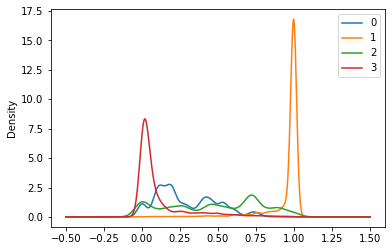

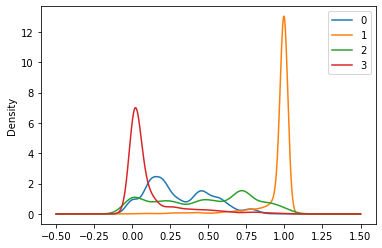

In [42]:
frame_treino_escalonado = pd.DataFrame(data = x_treino)
frame_teste_escalonado = pd.DataFrame(data = x_teste)

frame_treino_escalonado.plot.kde();
frame_teste_escalonado.plot.kde();

<h2><font color="red">4) Treinamento e Teste</font></h2>

Hora de treinar e depois testar nosso modelo

In [43]:
# Treino
regressao_linear.fit(x_treino, y_treino)
regressao_logistica.fit(x_treino, y_treino)
regressao_elastica.fit(x_treino, y_treino)
regressao_sgd.fit(x_treino, y_treino)
regressao_lasso.fit(x_treino, y_treino)
regressao_lasso_cv.fit(x_treino, y_treino)

regressao_lasso_cv.score(x_treino, y_treino)

C:\Users\gabri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gabri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\gabri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.02549641682988779

In [44]:
# Teste
predicao_treino_linear = regressao_linear.predict(x_treino)
predicao_teste_linear = regressao_linear.predict(x_teste)

predicao_treino_logistica = regressao_logistica.predict(x_treino)
predicao_teste_logistica = regressao_logistica.predict(x_teste)

predicao_treino_elastica = regressao_elastica.predict(x_treino)
predicao_teste_elastica = regressao_elastica.predict(x_teste)

predicao_treino_sgd = regressao_sgd.predict(x_treino)
predicao_teste_sgd = regressao_sgd.predict(x_teste)

predicao_treino_lasso = regressao_lasso.predict(x_treino)
predicao_teste_lasso = regressao_lasso.predict(x_teste)


predicao_treino_lasso_cv = regressao_lasso_cv.predict(x_treino)
predicao_teste_lasso_cv = regressao_lasso_cv.predict(x_teste)

<h2><font color="red">5) Análise dos Resultados</font></h2>

Por fim, vamos analisar qual foi o melhor algoritmo escolhido verificando a <em>acurácia</em> deles.

In [45]:
print('*** Regressão Linear ***')
print('Score de variação (Treino): %.2f' % regressao_linear.score(x_treino, y_treino))
print('Score de variação (Teste): %.2f' % regressao_linear.score(x_teste, y_teste))
print('\n')

print('*** Regressão Logística ***')
print('Score de variação (Treino): %.2f' % regressao_logistica.score(x_treino, y_treino))
print('Score de variação (Teste): %.2f' % regressao_logistica.score(x_teste, y_teste))
print('\n')

print('*** Regressão Elástica ***')
print('Score de variação (Treino): %.2f' % regressao_elastica.score(x_treino, y_treino))
print('Score de variação (Teste): %.2f' % regressao_elastica.score(x_teste, y_teste))
print('\n')

print('*** Regressão SGD ***')
print('Score de variação (Treino): %.2f' % regressao_sgd.score(x_treino, y_treino))
print('Score de variação (Teste): %.2f' % regressao_sgd.score(x_teste, y_teste))
print('\n')

print('*** Regressão Lasso ***')
print('Score de variação (Treino): %.2f' % regressao_lasso.score(x_treino, y_treino))
print('Score de variação (Teste): %.2f' % regressao_lasso.score(x_teste, y_teste))
print('\n')

print('*** Regressão Lasso CV ***')
print('Score de variação (Treino): %.2f' % regressao_lasso_cv.score(x_treino, y_treino))
print('Score de variação (Teste): %.2f' % regressao_lasso_cv.score(x_teste, y_teste))
print('\n')


*** Regressão Linear ***
Score de variação (Treino): 0.03
Score de variação (Teste): 0.02


*** Regressão Logística ***
Score de variação (Treino): 0.28
Score de variação (Teste): 0.27


*** Regressão Elástica ***
Score de variação (Treino): 0.00
Score de variação (Teste): 0.00


*** Regressão SGD ***
Score de variação (Treino): 0.02
Score de variação (Teste): 0.01


*** Regressão Lasso ***
Score de variação (Treino): 0.01
Score de variação (Teste): 0.01


*** Regressão Lasso CV ***
Score de variação (Treino): 0.03
Score de variação (Teste): 0.02




In [46]:
def Grafico_Resultados(regressao, titulo):
    plt.scatter(regressao.predict(x_treino), regressao.predict(x_treino) - y_treino, c = 'b', s = 40, alpha = 0.5)
    plt.scatter(regressao.predict(x_teste), regressao.predict(x_teste) - y_teste, c = 'g', s = 40, alpha = 0.5)
    plt.hlines(y = 0, xmin = 0, xmax = 50)
    plt.ylabel("Resíduo")
    plt.title("Residual %s - Treino(Azul), Teste(Verde)" % (titulo))
    plt.show()

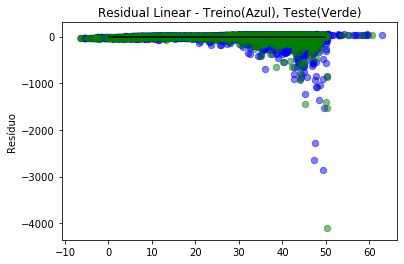

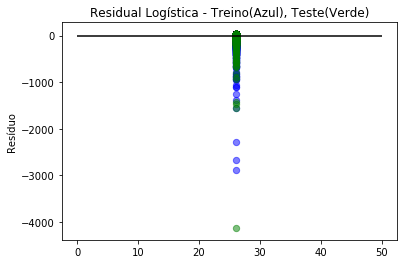

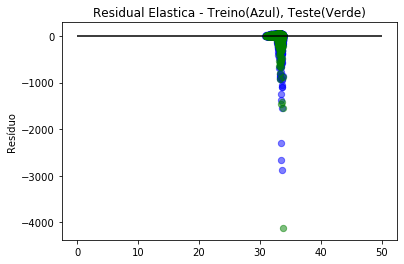

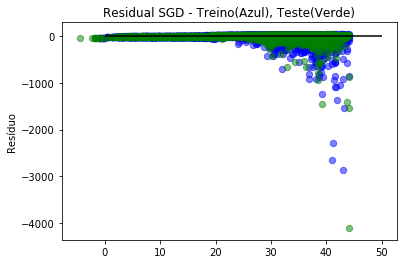

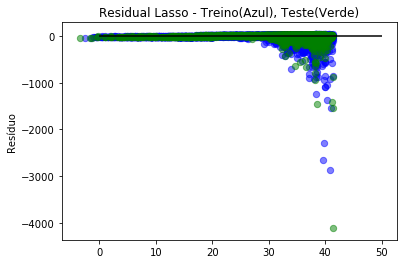

In [47]:
Grafico_Resultados(regressao_linear, 'Linear'); 
Grafico_Resultados(regressao_logistica, 'Logística'); 
Grafico_Resultados(regressao_elastica, 'Elastica');
Grafico_Resultados(regressao_sgd, 'SGD');
Grafico_Resultados(regressao_lasso, 'Lasso');

<h2><font color="red">6) Deploy</font></h2>

In [48]:
a = regressao_logistica.predict([[0, 2020, 7, 3]])
print(a)

[2]


In [49]:
a = regressao_lasso.predict([[0, 2020, 7, 3]])
print(a)

[-77.63564058]


In [50]:
a = regressao_elastica.predict([[0, 2020, 7, 3]])
print(a)

[381.18807921]
